In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
# spacy for lemmatization
import spacy
sns.set()

In [2]:
df = pd.read_csv("/content/emerged_data.csv", index_col=0)
df.head()

,msgdate,stars,body,subject,url,from,helpfulness,total_words,total_chars,stopwords_removed_body
0,2021-12-12T00:00:00,1.0 out of 5 stars,"Dog Vomit Like others, this dog food doesn’t s...","Amazon Brand – Wag Dry Dog Food, Chicken and B...",https://www.amazon.com/product-reviews/B0862Y4...,BRIAN D PEDERSON,NaN,20,111,"Dog Vomit Like others, dog food doesn’t settle..."
1,2021-12-12T00:00:00,4.0 out of 5 stars,"A good alternative to Merrick Usually, we feed...","Amazon Brand – Wag Dry Dog Food, Chicken and B...",https://www.amazon.com/product-reviews/B0862Y4...,Santo Esmeraldo,NaN,92,437,"A good alternative Merrick Usually, feed Merri..."
2,2021-12-11T00:00:00,5.0 out of 5 stars,My dogs love this food Our regular dog food de...,"Amazon Brand – Wag Dry Dog Food, Chicken and B...",https://www.amazon.com/product-reviews/B0862Y4...,Ms.TA,NaN,32,140,My dogs love food Our regular dog food deliver...
3,2021-12-11T00:00:00,3.0 out of 5 stars,One of my dogs was allergic One of our 2 dogs ...,"Amazon Brand – Wag Dry Dog Food, Chicken and B...",https://www.amazon.com/product-reviews/B0862Y4...,Merry Dove,NaN,45,192,One dogs allergic One 2 dogs started itching l...
4,2021-12-10T00:00:00,5.0 out of 5 stars,Awesome product Dogs really like this formula,"Amazon Brand – Wag Dry Dog Food, Chicken and B...",https://www.amazon.com/product-reviews/B0862Y4...,Steven Leach,NaN,7,39,Awesome product Dogs really like formula


In [3]:
df.body.value_counts()

Good Good                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    39
Great Great                                                                                                                                                                                                                                                                                                                                                                                                                                             

# **Preprocessing the Data and Conducting Analysis with WordCloud**

In [4]:
# import nltk library and then download stopwords
import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
data = list(df.body)
data[:2]

['Dog Vomit Like others, this dog food doesn’t settle well with my dog, vomiting immediately after consumption.  Would not recommend.',
 'A good alternative to Merrick Usually, we feed Merrick’s Salmon and Brown Rice formula, but the availability on Amazon as well as other vendors has been limited recently.  So, we thought we’d give the WAG version of the same: Salmon and Brown Rice.  My dog didn’t seem to mind the switch at all, and she has not shown adverse reactions—with the exception that she seems to get slight tear burns.  Nothing major, and the ingredients seem similar to Merrick’s, but there must be a minor difference.  Still, it is a viable alternative.']

In [6]:
stop_words = nltk.corpus.stopwords.words('english')

In [7]:
# Build the bigram and trigrams
bigram = gensim.models.Phrases(data, min_count=20, threshold=100) 
trigram = gensim.models.Phrases(bigram[data], threshold=100)  

bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [8]:
# only need tagger, no need for parser and named entity recognizer, for faster implementation
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [9]:
def process_words(texts, stop_words=stop_words, allowed_tags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    
    """Convert a document into a list of lowercase tokens, build bigrams-trigrams, implement lemmatization"""
    
    # remove stopwords, short tokens and letter accents 
    texts = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts]
    
    # bi-gram and tri-gram implementation
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    
    texts_out = []

    # implement lemmatization and filter out unwanted part of speech tags
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_tags])
    
    # remove stopwords and short tokens again after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc), deacc=True, min_len=3) if word not in stop_words] for doc in texts_out]    
    
    return texts_out

In [10]:
data_ready = process_words(data)  

In [11]:
data_ready[0]

['dog',
 'vomit',
 'dog',
 'food',
 'settle',
 'well',
 'dog',
 'vomit',
 'immediately',
 'consumption',
 'would',
 'recommend']

In [12]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 6343


In [13]:
# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

In [14]:
corpus

[[(0, 1), (1, 3), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1)],
 [(7, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 3),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1)],
 [(1, 1),
  (2, 2),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 2),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1)],
 [(1, 4),
  (2, 2),
  (15, 1),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 2),
  (62, 1)],
 [(1, 1), (16, 1), (63, 1), (64, 1), (65, 1)],
 [(1, 1),
  (7, 1),
  (19, 1),
  (29, 1),
  (66, 1),
  (67, 2),
  (68, 1),
  (69, 1),
  (70, 1)],
 [(45, 2), (52, 1)],
 [(1, 2),
  (2, 1),
  (4, 1),
  (8, 1),
  (17, 1),
  (64, 1),
  (70, 2),
  (71, 1),
  (72, 1),
  (73, 

In [15]:
dict_corpus = {}

for i in range(len(corpus)):
  for idx, freq in corpus[i]:
    if id2word[idx] in dict_corpus:
      dict_corpus[id2word[idx]] += freq
    else:
       dict_corpus[id2word[idx]] = freq


In [16]:
dict_df = pd.DataFrame.from_dict(dict_corpus, orient='index', columns=['freq'])

In [17]:
dict_df

,freq
consumption,13
dog,12167
food,10413
immediately,141
recommend,631
...,...
zagat,1
discoloration,1
surehow,1
bbq,1


In [18]:
dict_df.sort_values('freq', ascending=False).head(10)

,freq
dog,12167
food,10413
love,6136
eat,3429
good,3245
great,2515
bag,1919
product,1694
buy,1623
get,1620


In [19]:
dict_df[dict_df['freq']==1]

,freq
viable,1
itbut,1
wrestling,1
addict,1
spite,1
...,...
zagat,1
discoloration,1
surehow,1
bbq,1


In [20]:
extension = dict_df[dict_df.freq>10000].index.tolist()

In [21]:
extension

['dog', 'food']

In [22]:
stop_words.extend(extension)

In [23]:
data_ready = process_words(data)

In [24]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 6418


In [25]:
# Filter out words that occur less than 10 documents, or more than 50% of the documents.

id2word.filter_extremes(no_below=10, no_above=0.5)

print('Total Vocabulary Size:', len(id2word))

Total Vocabulary Size: 1351


In [26]:
# Create Corpus: Term Document Frequency
id2word.filter_extremes(no_below=10, no_above=0.5)

print('Total Vocabulary Size:', len(id2word))

corpus = [id2word.doc2bow(text) for text in data_ready]

Total Vocabulary Size: 1351


In [ ]:
corpus

# **Build Topic Model**

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

In [30]:
!unzip mallet-2.0.8.zip

Archive:  mallet-2.0.8.zip
replace mallet-2.0.8/bin/classifier2info? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mallet-2.0.8/bin/classifier2info  
replace mallet-2.0.8/bin/csv2classify? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mallet-2.0.8/bin/csv2classify  
replace mallet-2.0.8/bin/csv2vectors? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mallet-2.0.8/bin/csv2vectors  
replace mallet-2.0.8/bin/mallet? [y]es, [n]o, [A]ll, [N]one, [r]ename: t
error:  invalid response [t]
replace mallet-2.0.8/bin/mallet? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: mallet-2.0.8/bin/mallet  
replace mallet-2.0.8/bin/mallet.bat? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [31]:
mallet_path = '/content/mallet-2.0.8/bin/mallet'

In [32]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [33]:
from pprint import pprint
# display topics
pprint(ldamallet.show_topics(formatted=False))

[(0,
  [('product', 0.16549465369424912),
   ('price', 0.1325498506887583),
   ('store', 0.05548598400924767),
   ('deliver', 0.037183315672863884),
   ('delivery', 0.03660533667276756),
   ('easy', 0.034486080339081016),
   ('good', 0.03361911183893652),
   ('money', 0.029765918504960985),
   ('cheap', 0.024756767170792796),
   ('fast', 0.021770542336961757)]),
 (1,
  [('buy', 0.13174290867355304),
   ('make', 0.09665518937530743),
   ('sick', 0.05902606984751599),
   ('bad', 0.04664699131005083),
   ('start', 0.044843416953598954),
   ('diarrhea', 0.03484177734054763),
   ('throw', 0.03336612559435973),
   ('week', 0.03139858993277587),
   ('back', 0.02967699622888998),
   ('day', 0.029595015576323987)]),
 (2,
  [('good', 0.2674484584830717),
   ('quality', 0.10251560431246454),
   ('ingredient', 0.08142613958766787),
   ('taste', 0.06166067713258937),
   ('happy', 0.052392661244562135),
   ('flavor', 0.048136939663325135),
   ('healthy', 0.03414034424059013),
   ('meal', 0.030357480

In [34]:
# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

Coherence Score:  0.5738020916523703


In [35]:
tm = ldamallet[corpus[1]]
tm

[(0, 0.0779436152570481),
 (1, 0.07628524046434494),
 (2, 0.10281923714759536),
 (3, 0.1310116086235489),
 (4, 0.175787728026534),
 (5, 0.10945273631840796),
 (6, 0.07462686567164178),
 (7, 0.10281923714759536),
 (8, 0.07462686567164178),
 (9, 0.07462686567164178)]

In [36]:
tm_results = ldamallet[corpus]

In [37]:
tm_results

[[(0, 0.08928571428571429),
  (1, 0.14285714285714285),
  (2, 0.08928571428571429),
  (3, 0.10714285714285714),
  (4, 0.10317460317460317),
  (5, 0.10714285714285714),
  (6, 0.08928571428571429),
  (7, 0.09126984126984126),
  (8, 0.08928571428571429),
  (9, 0.09126984126984126)],
 [(0, 0.07628524046434494),
  (1, 0.0779436152570481),
  (2, 0.1044776119402985),
  (3, 0.13266998341625208),
  (4, 0.1791044776119403),
  (5, 0.10613598673300166),
  (6, 0.07462686567164178),
  (7, 0.09950248756218906),
  (8, 0.07462686567164178),
  (9, 0.07462686567164178)],
 [(0, 0.14629629629629629),
  (1, 0.1),
  (2, 0.08333333333333333),
  (3, 0.08333333333333333),
  (4, 0.08333333333333333),
  (5, 0.08333333333333333),
  (6, 0.1037037037037037),
  (7, 0.08333333333333333),
  (8, 0.08333333333333333),
  (9, 0.15)],
 [(0, 0.08064516129032258),
  (1, 0.14516129032258066),
  (2, 0.08064516129032258),
  (3, 0.10931899641577061),
  (4, 0.16129032258064516),
  (5, 0.08422939068100359),
  (6, 0.0967741935483871

In [38]:
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] for topics in tm_results]

In [39]:
corpus_topics

[(1, 0.14285714285714285),
 (4, 0.1791044776119403),
 (9, 0.15),
 (4, 0.16129032258064516),
 (0, 0.13207547169811323),
 (2, 0.12525252525252523),
 (9, 0.1346153846153846),
 (0, 0.12903225806451613),
 (0, 0.15517241379310345),
 (8, 0.12962962962962965),
 (8, 0.16363636363636364),
 (6, 0.13479052823315119),
 (5, 0.14638447971781307),
 (2, 0.1987480438184664),
 (3, 0.1341991341991342),
 (4, 0.15254237288135594),
 (3, 0.1475409836065574),
 (0, 0.12698412698412698),
 (8, 0.14230019493177387),
 (7, 0.14285714285714288),
 (6, 0.14516129032258066),
 (8, 0.1527777777777778),
 (6, 0.1625),
 (1, 0.14571948998178508),
 (2, 0.1822721598002497),
 (9, 0.1346153846153846),
 (2, 0.12788259958071282),
 (5, 0.17241379310344826),
 (5, 0.13207547169811323),
 (1, 0.13207547169811323),
 (6, 0.125),
 (2, 0.13932980599647268),
 (4, 0.14285714285714285),
 (5, 0.1580246913580247),
 (1, 0.20751633986928106),
 (8, 0.11320754716981135),
 (0, 0.10000000000000002),
 (1, 0.19005847953216376),
 (2, 0.13799283154121864)

In [40]:
topics = [[(term, round(wt, 3)) for term, wt in ldamallet.show_topic(n, topn=20)] for n in range(0, ldamallet.num_topics)]

In [41]:
topics

[[('product', 0.165),
  ('price', 0.133),
  ('store', 0.055),
  ('deliver', 0.037),
  ('delivery', 0.037),
  ('easy', 0.034),
  ('good', 0.034),
  ('money', 0.03),
  ('cheap', 0.025),
  ('fast', 0.022),
  ('excellent', 0.019),
  ('worth', 0.018),
  ('save', 0.018),
  ('ship', 0.017),
  ('nice', 0.016),
  ('door', 0.016),
  ('convenient', 0.013),
  ('shipping', 0.013),
  ('pay', 0.013),
  ('local', 0.012)],
 [('buy', 0.132),
  ('make', 0.097),
  ('sick', 0.059),
  ('bad', 0.047),
  ('start', 0.045),
  ('diarrhea', 0.035),
  ('throw', 0.033),
  ('week', 0.031),
  ('back', 0.03),
  ('day', 0.03),
  ('review', 0.028),
  ('stop', 0.025),
  ('change', 0.021),
  ('vomit', 0.018),
  ('read', 0.015),
  ('wrong', 0.012),
  ('fine', 0.011),
  ('immediately', 0.011),
  ('month', 0.01),
  ('horrible', 0.009)],
 [('good', 0.267),
  ('quality', 0.103),
  ('ingredient', 0.081),
  ('taste', 0.062),
  ('happy', 0.052),
  ('flavor', 0.048),
  ('healthy', 0.034),
  ('meal', 0.03),
  ('enjoy', 0.027),
  ('

In [42]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], columns = ['Term'+str(i) for i in range(1, 21)],
                         index=['Topic '+str(t) for t in range(1, ldamallet.num_topics+1)]).T
topics_df.head()

,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6,Topic 7,Topic 8,Topic 9,Topic 10
Term1,product,buy,good,brand,issue,give,eat,bag,small,love
Term2,price,make,quality,year,switch,time,mix,order,dry,great
Term3,store,sick,ingredient,recommend,problem,day,picky,open,flavor,baby
Term4,deliver,bad,taste,feed,stomach,feed,smell,box,chicken,pup
Term5,delivery,start,happy,healthy,grain,put,stuff,purchase,kibble,fur


In [43]:
pd.set_option('display.max_colwidth', -1)

topics_df = pd.DataFrame([', '.join([term for term, wt in topic]) for topic in topics], columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, ldamallet.num_topics+1)] )
topics_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Terms per Topic
Topic1,"product, price, store, deliver, delivery, easy, good, money, cheap, fast, excellent, worth, save, ship, nice, door, convenient, shipping, pay, local"
Topic2,"buy, make, sick, bad, start, diarrhea, throw, week, back, day, review, stop, change, vomit, read, wrong, fine, immediately, month, horrible"
Topic3,"good, quality, ingredient, taste, happy, flavor, healthy, meal, enjoy, expensive, find, approve, list, gobble, choice, option, rate, filler, nutrition, tasty"
Topic4,"brand, year, recommend, feed, healthy, vet, month, coat, diet, pet, blue, health, science, lab, soft, cost, weight, highly, iam, live"
Topic5,"issue, switch, problem, stomach, grain, high, skin, allergy, free, work, sensitive, find, formula, poop, change, stool, vet, protein, gas, upset"
Topic6,"give, time, day, feed, put, thing, lot, feel, treat, refuse, life, run, long, star, end, pretty, home, half, brand, energy"
Topic7,"eat, mix, picky, smell, stuff, bowl, eater, hard, leave, cat, regular, touch, cesar, turn, finally, hate, pick, super, guess, walk"
Topic8,"bag, order, open, box, purchase, time, package, fresh, receive, arrive, pound, container, full, return, item, find, plan, pro, bug, send"
Topic9,"small, dry, flavor, chicken, kibble, size, big, perfect, large, bit, add, variety, portion, piece, pedigree, wet, bite, breed, meat, rice"
Topic10,"love, great, baby, pup, fur, favorite, absolutely, girl, boy, wonderful, yorkie, win, doggie, devour, kid, woof, ceasar, maltese, med, job"


# **Analysis of the Topics**

In [44]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

In [45]:
plt.rcParams['figure.figsize'] = [20, 15]

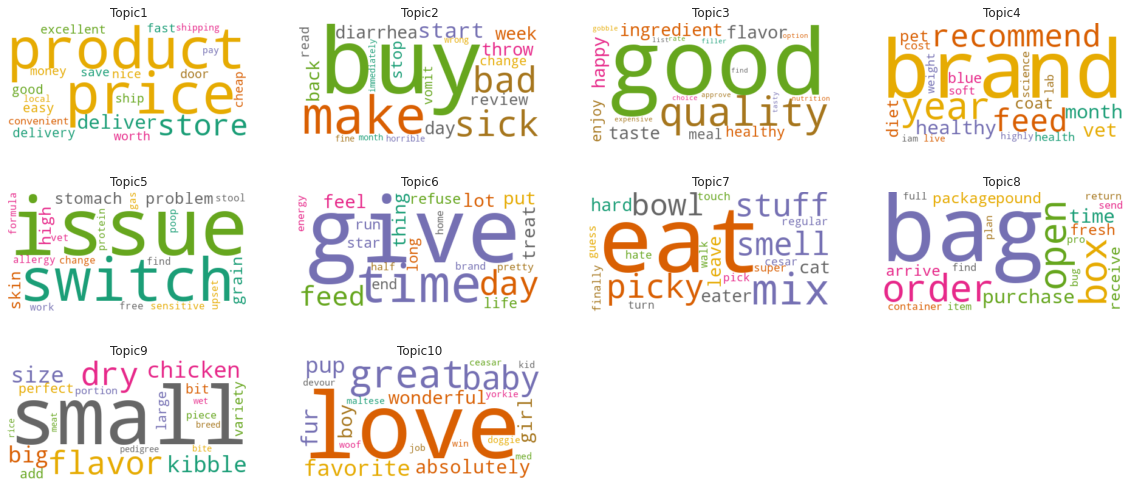

In [46]:
# Create subplots for each topic
for i in range(10):

    wc.generate(text=topics_df["Terms per Topic"][i])
    
    plt.subplot(5, 4, i+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(topics_df.index[i])

plt.show()

In [49]:
# create a dataframe 
corpus_topic_df = pd.DataFrame()

# get the Titles from the original dataframe
corpus_topic_df['Title'] = df.body

corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Terms'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]

corpus_topic_df.head()

,Title,Dominant Topic,Contribution %,Topic Terms
0,"Dog Vomit Like others, this dog food doesn’t settle well with my dog, vomiting immediately after consumption. Would not recommend.",2,14.29,"buy, make, sick, bad, start, diarrhea, throw, week, back, day, review, stop, change, vomit, read, wrong, fine, immediately, month, horrible"
1,"A good alternative to Merrick Usually, we feed Merrick’s Salmon and Brown Rice formula, but the availability on Amazon as well as other vendors has been limited recently. So, we thought we’d give the WAG version of the same: Salmon and Brown Rice. My dog didn’t seem to mind the switch at all, and she has not shown adverse reactions—with the exception that she seems to get slight tear burns. Nothing major, and the ingredients seem similar to Merrick’s, but there must be a minor difference. Still, it is a viable alternative.",5,17.91,"issue, switch, problem, stomach, grain, high, skin, allergy, free, work, sensitive, find, formula, poop, change, stool, vet, protein, gas, upset"
2,My dogs love this food Our regular dog food delivery was delayed by Chewy. I needed something quick so I thought I’d try this one with my girls. They loved it.Great value!,10,15.00,"love, great, baby, pup, fur, favorite, absolutely, girl, boy, wonderful, yorkie, win, doggie, devour, kid, woof, ceasar, maltese, med, job"
3,One of my dogs was allergic One of our 2 dogs started itching like crazy after we started feed them this. When we went back to our previous brand of dog food the itching stopped. Obviously she was allergic to something in this dog food.,5,16.13,"issue, switch, problem, stomach, grain, high, skin, allergy, free, work, sensitive, find, formula, poop, change, stool, vet, protein, gas, upset"
4,Awesome product Dogs really like this formula,1,13.21,"product, price, store, deliver, delivery, easy, good, money, cheap, fast, excellent, worth, save, ship, nice, door, convenient, shipping, pay, local"


In [50]:
df['Dominant Topic'] = corpus_topic_df['Dominant Topic']
df['Contribution %'] = corpus_topic_df['Contribution %']
df['Topic Terms'] = corpus_topic_df['Topic Terms']

In [52]:
df.head()

,msgdate,stars,body,subject,url,from,helpfulness,total_words,total_chars,stopwords_removed_body,Dominant Topic,Contribution %,Topic Terms
0,2021-12-12T00:00:00,1.0 out of 5 stars,"Dog Vomit Like others, this dog food doesn’t settle well with my dog, vomiting immediately after consumption. Would not recommend.","Amazon Brand – Wag Dry Dog Food, Chicken and Brown Rice 5 lb Bag",https://www.amazon.com/product-reviews/B0862Y45TC/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1,BRIAN D PEDERSON,NaN,20,111,"Dog Vomit Like others, dog food doesn’t settle well dog, vomiting immediately consumption. Would recommend.",2,14.29,"buy, make, sick, bad, start, diarrhea, throw, week, back, day, review, stop, change, vomit, read, wrong, fine, immediately, month, horrible"
1,2021-12-12T00:00:00,4.0 out of 5 stars,"A good alternative to Merrick Usually, we feed Merrick’s Salmon and Brown Rice formula, but the availability on Amazon as well as other vendors has been limited recently. So, we thought we’d give the WAG version of the same: Salmon and Brown Rice. My dog didn’t seem to mind the switch at all, and she has not shown adverse reactions—with the exception that she seems to get slight tear burns. Nothing major, and the ingredients seem similar to Merrick’s, but there must be a minor difference. Still, it is a viable alternative.","Amazon Brand – Wag Dry Dog Food, Chicken and Brown Rice 5 lb Bag",https://www.amazon.com/product-reviews/B0862Y45TC/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1,Santo Esmeraldo,NaN,92,437,"A good alternative Merrick Usually, feed Merrick’s Salmon Brown Rice formula, availability Amazon well vendors limited recently. So, thought we’d give WAG version same: Salmon Brown Rice. My dog didn’t seem mind switch all, shown adverse reactions—with exception seems get slight tear burns. Nothing major, ingredients seem similar Merrick’s, must minor difference. Still, viable alternative.",5,17.91,"issue, switch, problem, stomach, grain, high, skin, allergy, free, work, sensitive, find, formula, poop, change, stool, vet, protein, gas, upset"
2,2021-12-11T00:00:00,5.0 out of 5 stars,My dogs love this food Our regular dog food delivery was delayed by Chewy. I needed something quick so I thought I’d try this one with my girls. They loved it.Great value!,"Amazon Brand – Wag Dry Dog Food, Chicken and Brown Rice 5 lb Bag",https://www.amazon.com/product-reviews/B0862Y45TC/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1,Ms.TA,NaN,32,140,My dogs love food Our regular dog food delivery delayed Chewy. I needed something quick I thought I’d try one girls. They loved it.Great value!,10,15.00,"love, great, baby, pup, fur, favorite, absolutely, girl, boy, wonderful, yorkie, win, doggie, devour, kid, woof, ceasar, maltese, med, job"
3,2021-12-11T00:00:00,3.0 out of 5 stars,One of my dogs was allergic One of our 2 dogs started itching like crazy after we started feed them this. When we went back to our previous brand of dog food the itching stopped. Obviously she was allergic to something in this dog food.,"Amazon Brand – Wag Dry Dog Food, Chicken and Brown Rice 5 lb Bag",https://www.amazon.com/product-reviews/B0862Y45TC/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pageNumber=1,Merry Dove,NaN,45,192,One dogs allergic One 2 dogs started itching like crazy started feed this. When went back previous brand dog food itching stopped. Obviously allergic something dog food.,5,16.13,"issue, switch, problem, stomach, grain, high, skin, allergy, free, work, sensitive, find, formula, poop, change, stool, vet, protein, gas, upset"
4,2021-12-10T00:00:00,5.0 out of 5 stars,Awesome product Dogs really like this formula,"Amazon Brand – Wag Dry Dog Food, Chicken and Brown Rice 5 lb Bag",https://www.amazon.com/product-reviews/B0862Y45TC/ref=cm_cr_arp_d_viewopt_srt?ie=UTF8&reviewerType=all_reviews&sortBy=recent&pag